In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
%run Sql_Config.ipynb
df = pd.read_sql("select Sex,EntryType,School,Position,Status from Analyze02 ", connect()[0])
print(connect()[1])
df.columns

Success


Index(['Sex', 'EntryType', 'School', 'Position', 'Status'], dtype='object')

### DataFrame 
#### 運算
- 算平均
    + df.value_counts(<font color=crimson >normalize=True</font>)
- 取小數
    + df.round(<font color=crimson >integer</font>)
    
#### 排序

- 依索引排序
    + df.sort_index()
- 由大到小
    + df.value_counts()
- 由小到大
    + df.value_counts(<font color=crimson >ascending=True</font>)

### 計算屬性比例

In [3]:
def percentage(DF_Column):
    After = DF_Column.value_counts(normalize=True).sort_index().round(2).mul(100)
    return After

- Sex => 1：男生 2：女生

In [4]:
percentage(df['Sex'])

1    84.0
2    16.0
Name: Sex, dtype: float64

- Etype => 1：一般生 2：甄試生 3：僑生

In [5]:
percentage(df['EntryType'])

1    41.0
2    58.0
3     1.0
Name: EntryType, dtype: float64

- School => 1：國立 2：私立 3：海外

In [6]:
percentage(df['School'])

1    51.0
2    49.0
3     0.0
Name: School, dtype: float64

- Position => 1：教授 2：副教授 3：兼任教授 4：助理教授

In [7]:
percentage(df['Position'])

1    34.0
2    56.0
3     5.0
4     5.0
Name: Position, dtype: float64

- Status => 1：在學 2：提前畢業 3：正常畢業 4：延畢 5：休退學

In [8]:
percentage(df['Status'])

1    11.0
2     2.0
3    65.0
4    17.0
5     5.0
Name: Status, dtype: float64

### Chart
- 圖例位置(Legend Locaion)

| best | upper right | upper left | lower left | lower right | right | center left | center right | lower center | upper center | center |
|------|-------------|------------|------------|-------------|-------|-------------|--------------|--------------|--------------|--------|
| 0    | 1           | 2          | 3          | 4           | 5     | 6           | 7            | 8            | 9            | 10     |

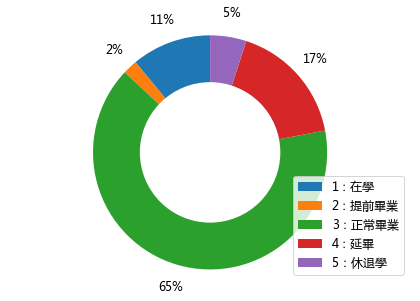

In [93]:
# Donut chart 
labels = [r'1：在學',r'2：提前畢業',r'3：正常畢業',r'4：延畢',r'5：休退學']
colors = ['#c4eada','#fcf3ca','#ef7b7b','#919190','slateblue']
explode = (0, 0, 0.1, 0.1,0)
fig1, ax1 = plt.subplots()
abc = ax1.pie( Per_df           #DataFrame
            ,autopct='%1.0f%%'  #數值
            ,pctdistance=1.2    #數值與圓心距離
            ,startangle=90)     #起始角度

#中心塗白色
centre_circle = plt.Circle((0,0),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  #確保圓餅圖不會因資料比例變形
plt.legend(labels, loc=4)
plt.tight_layout()
plt.show()

### DataFrame 過濾欄位內特定屬性

fliter = (DataFrame["Column"] == "Attritube")<br>DataFrame[fliter]

In [10]:
# 過濾掉「在學」 status = 1
df_Graduated = df['Status'] != 1 
df[df_Graduated]

,Sex,EntryType,School,Position,Status
0,2,2,1,2,3
1,1,2,2,2,3
2,1,2,1,1,3
3,1,2,2,2,5
5,1,1,1,2,3
7,1,1,2,4,4
8,1,2,1,1,3
9,2,2,2,2,3
10,1,2,1,2,3
11,2,1,1,1,3


In [11]:
Graduated = df[df_Graduated]['Status'].value_counts(normalize=True).sort_index().round(2).mul(100)
# df.loc[df['Status'].isin(['2','3','4','5'])]
Graduated

2     3.0
3    73.0
4    19.0
5     6.0
Name: Status, dtype: float64

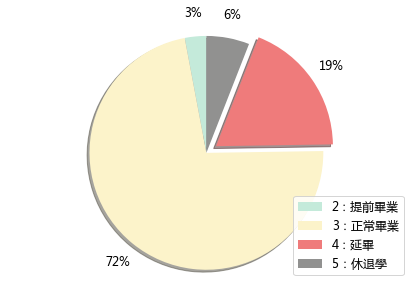

In [98]:
# Pie chart
plt.rcParams['font.size'] = 12 #字體大小
labels = [r'2：提前畢業',r'3：正常畢業',r'4：延畢',r'5：休退學']
explode = ( 0, 0, 0.1,0)
colors = ['#c4eada','#fcf3ca','#ef7b7b','#919190','slateblue']
fig1, ax1 = plt.subplots()
abc = ax1.pie(Graduated       #DataFrame
            ,explode=explode    #浮體
            ,colors=colors      #顏色
            ,shadow=True        #陰影
            ,autopct='%1.0f%%'  #數值
            ,pctdistance=1.2    #數值與圓心距離
            ,startangle=90)     #起始角度
ax1.axis('equal')  #確保圓餅圖不會因資料比例變形
plt.legend(labels, loc=4)
plt.tight_layout()
plt.show()

In [12]:
print(df.columns) # View Columns
print(df.drop('Status',axis=1).columns)  # Matrix X's Columns

Index(['Sex', 'EntryType', 'School', 'Position', 'Status'], dtype='object')
Index(['Sex', 'EntryType', 'School', 'Position'], dtype='object')


### Train Data & Test Data

In [13]:
X = df[df_Graduated].drop('Status',axis=1)
y = df[df_Graduated]['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=200)

### Train Data

### 模擬預測
- DecisionTreeClassifier() => Gini impurity (Gini不纯度)
- DecisionTreeClassifier(criterion='entropy') => 熵

In [14]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
data_clf = clf.fit(X_train, y_train)
print(clf.classes_ ) #預測結果類別

[2 3 4 5]


In [15]:
y_test_predicted = data_clf.predict(X_test)
print(y_test_predicted) 

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3]


### 預測準確率

In [16]:
from sklearn import metrics
y_test_predicted = data_clf.predict(X_test) # 預測
accuracy = metrics.accuracy_score(y_test, y_test_predicted) # 準確率
print(accuracy)

0.719512195122


In [105]:
predictions = data_clf.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          2       0.00      0.00      0.00         3
          3       0.73      0.99      0.84       118
          4       0.25      0.03      0.06        31
          5       0.00      0.00      0.00        12

avg / total       0.57      0.72      0.62       164

[[  0   3   0   0]
 [  0 117   1   0]
 [  0  30   1   0]
 [  0  10   2   0]]


D:\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 輸入資料測試 結果

- Sex => 1：男生 2：女生
- Etype => 1：一般生 2：甄試生 3：僑生
- School => 1：國立 2：私立 3：海外
- Position => 1：教授 2：副教授 3：兼任教授 4：助理教授

In [78]:
Sex = int(input('Sex = '))
Etype = int(input('Etype = '))
School = int(input('School = '))
Position = int(input('Position = '))
Data = [Sex,Etype,School,Position]

wantPredict = clf.predict([Data]) 
if wantPredict == [2]:
    print('\n提前畢業')
elif wantPredict == [3]:
    print('\n正常畢業')
elif wantPredict == [4]:
    print('\n延畢')
elif wantPredict == [5]:
    print('\n休退學')

Sex = 1
Etype = 2
School = 2
Position = 1

正常畢業


### GraphViz's executables not found 或 dot.exe" not found in path
- [教學Link](http://beanobody.blogspot.tw/2017/04/graphvizs-executables-not-found.html)
- 確認電腦裡有沒有Graphviz(請前去http://www.graphviz.org/下載與安裝)
- import os
- print(os.environ['PATH'])
### [sklearn.tree.export_graphviz¶](http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html)

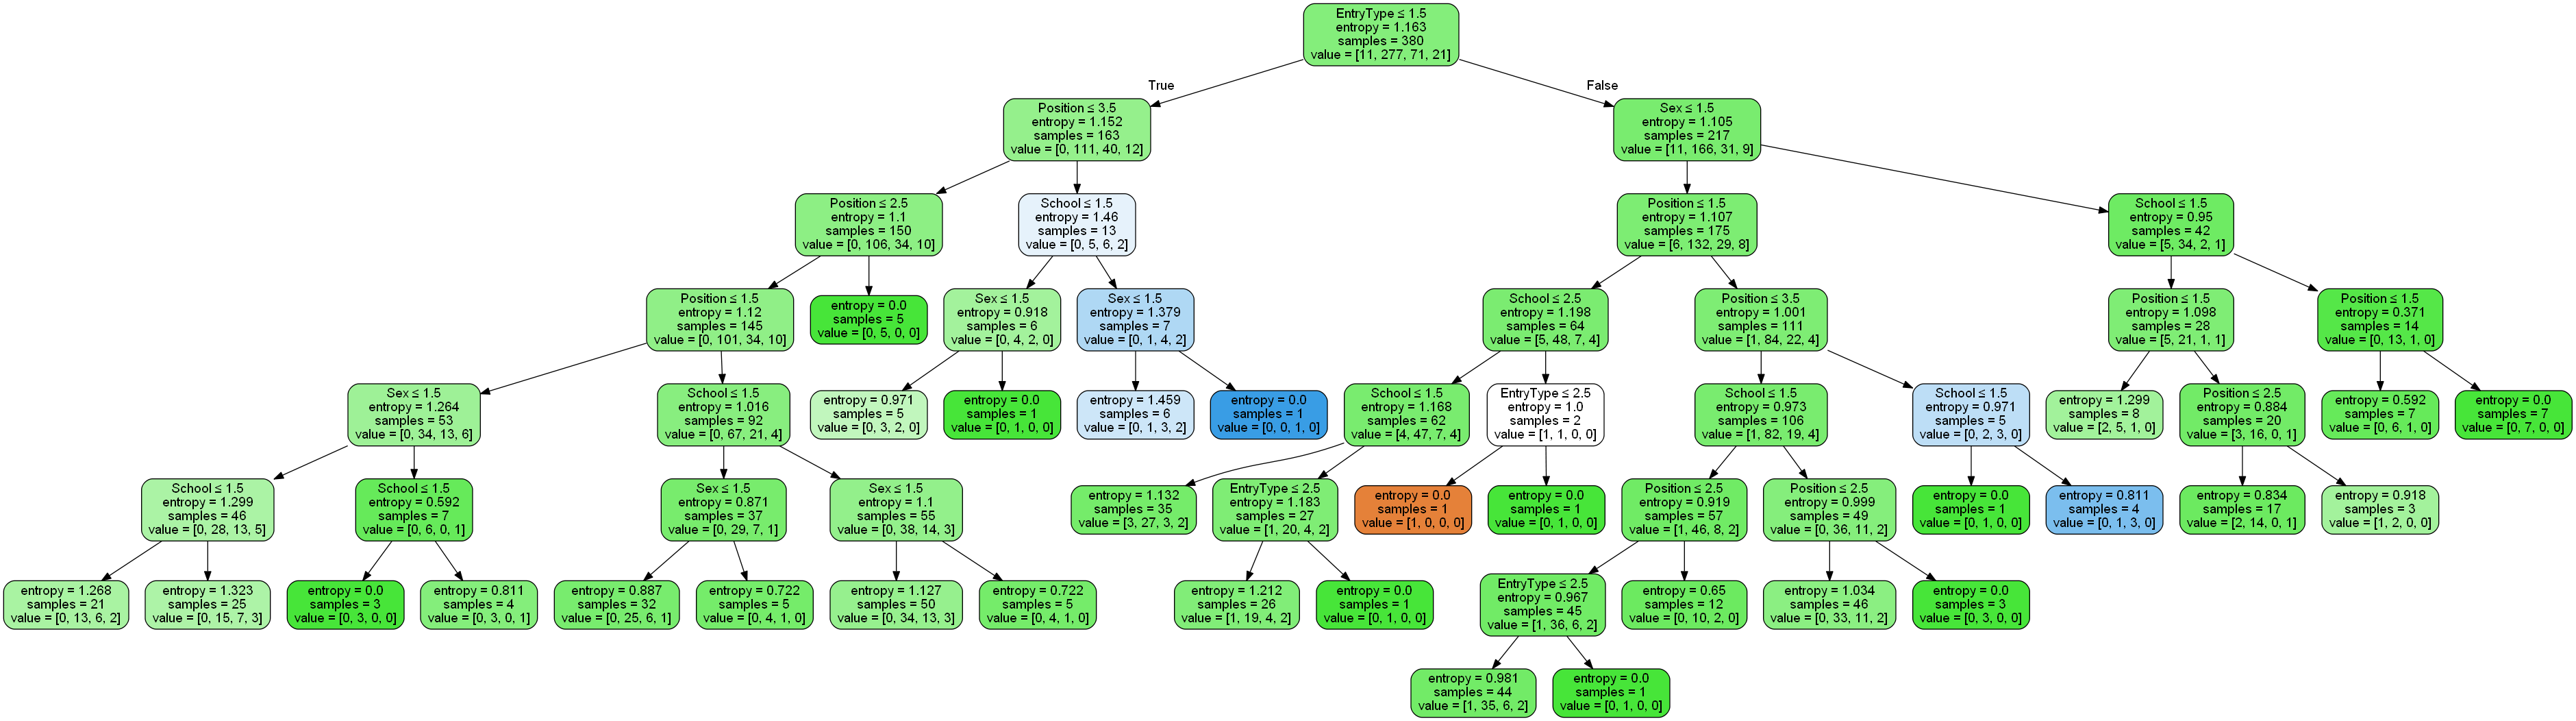

In [106]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

import os
os.environ['PATH'] = os.environ['PATH'] + (';c:\\Program Files (x86)\\Graphviz2.38\\bin\\')

dot_data = StringIO()

export_graphviz(clf,
                out_file=dot_data,  
                feature_names = ['Sex','EntryType','School','Position'],
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_pdf("123.pdf")
Image(graph.create_png())

# python collections defaultdict
### [Python Color](https://matplotlib.org/examples/color/named_colors.html)

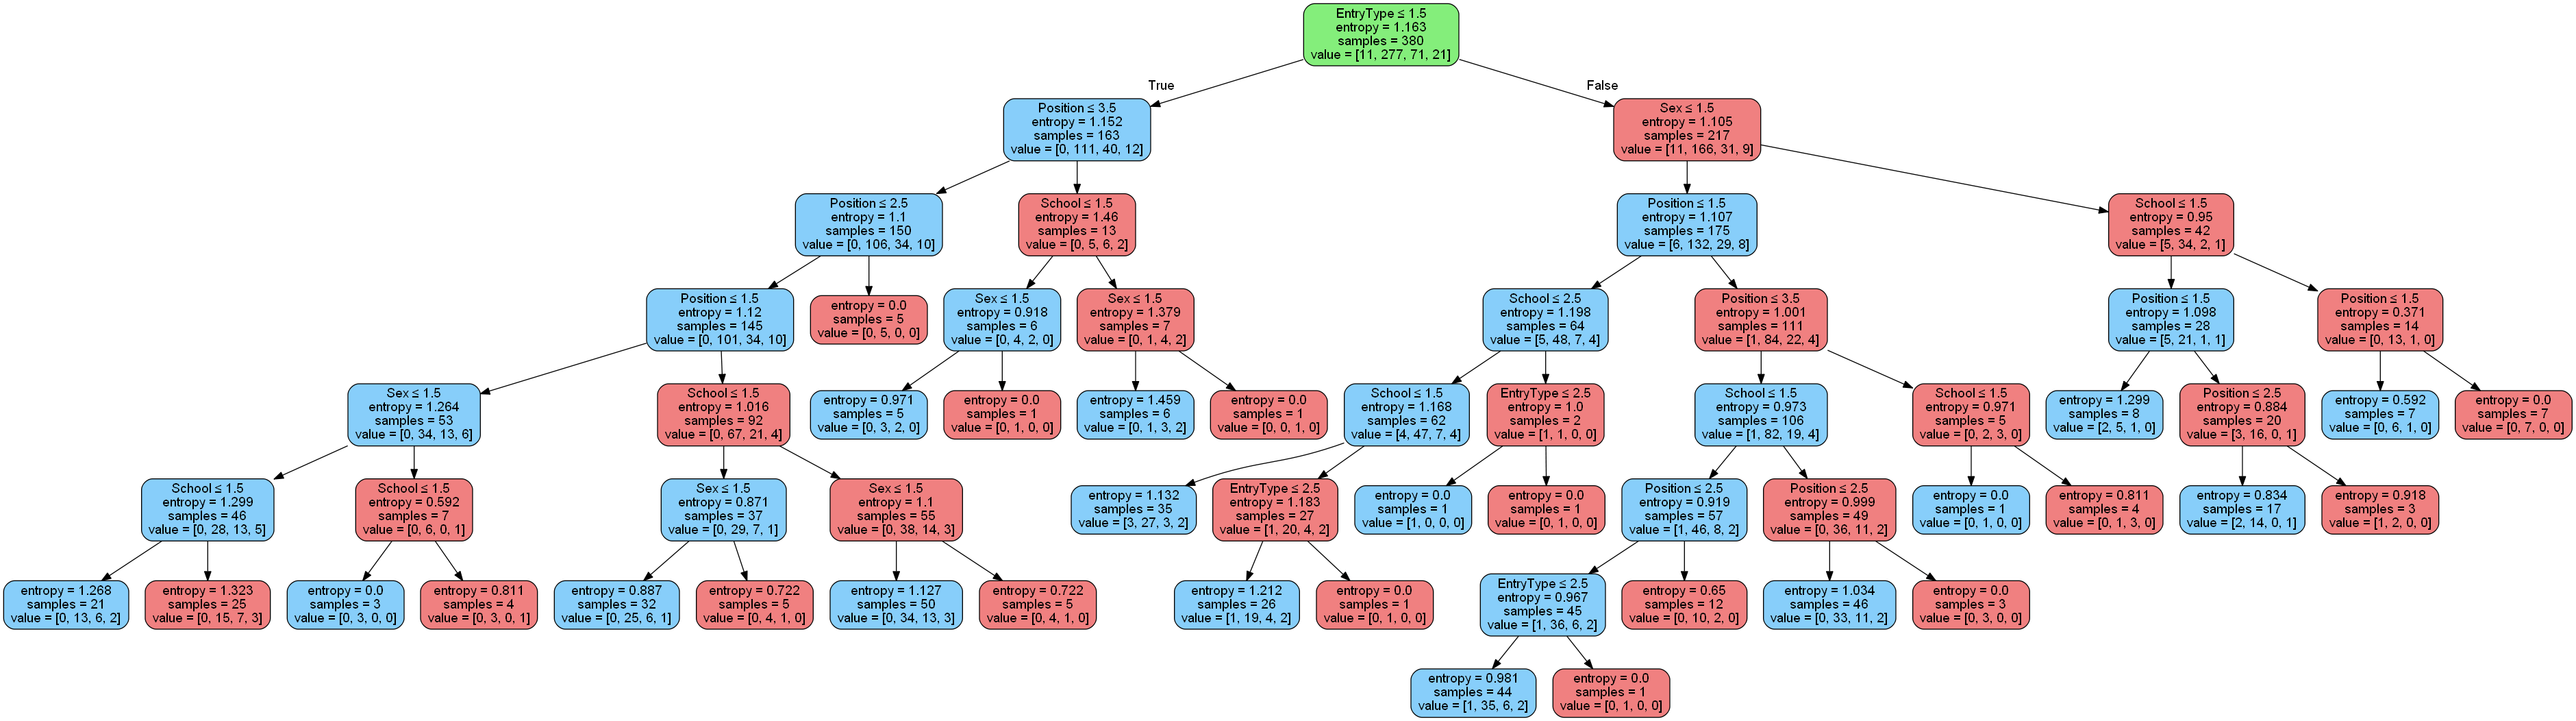

In [107]:
import collections
colors = ('lightskyblue', 'lightcoral')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')
Image(graph.create_png())